In [9]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import cv2
%matplotlib inline

# Data

In [10]:
data_path = '/home/stepan/Documents/alphabet/'
train_data_path = 'asl_alphabet_train/'
test_data_path = 'asl_alphabet_test/'

In [11]:
test_images_names = os.listdir(data_path + test_data_path)

In [12]:
test_images_names

['S_test.jpg',
 'T_test.jpg',
 'B_test.jpg',
 'F_test.jpg',
 'W_test.jpg',
 'X_test.jpg',
 'V_test.jpg',
 'nothing_test.jpg',
 'D_test.jpg',
 'Q_test.jpg',
 'L_test.jpg',
 'I_test.jpg',
 'K_test.jpg',
 'E_test.jpg',
 'Y_test.jpg',
 'A_test.jpg',
 'O_test.jpg',
 'R_test.jpg',
 'space_test.jpg',
 'G_test.jpg',
 'P_test.jpg',
 'J_test.jpg',
 'N_test.jpg',
 'Z_test.jpg',
 'C_test.jpg',
 'M_test.jpg',
 'H_test.jpg',
 'U_test.jpg']

In [13]:
def get_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
def get_adaptive_thresh(img):
    gray = get_gray(img)
    threshold_image = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
    return threshold_image
def get_thresh(img):
    gray = get_gray(img)
    ret, threshold_image1 = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY)
    ret, threshold_image2 = cv2.threshold(gray, ret, 255, cv2.THRESH_BINARY)
    return cv2.bitwise_and(threshold_image1, threshold_image2)

In [14]:
def draw_images(get_img, images_names, num=5, cmap=plt.cm.binary):
    for img_name in images_names[:num]:
        image = cv2.imread(data_path + test_data_path + img_name)
        plt.figure(figsize=(3,3))
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        img = get_img(image)
        plt.imshow(img, cmap=cmap)
        plt.xlabel(img_name[:-(len(img_name) - 1)])

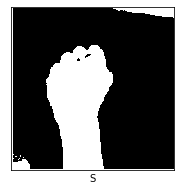

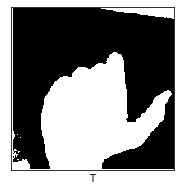

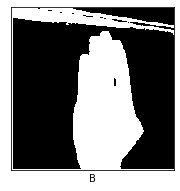

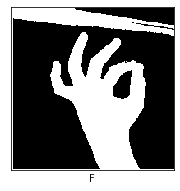

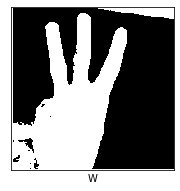

In [15]:
draw_images(get_thresh, test_images_names)

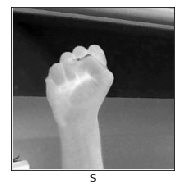

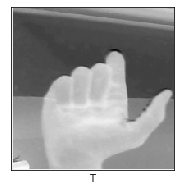

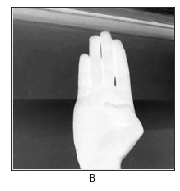

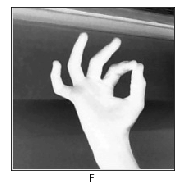

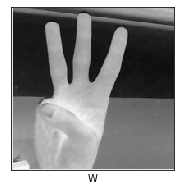

In [16]:
draw_images(get_gray, test_images_names)

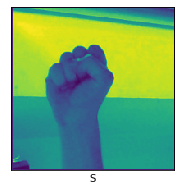

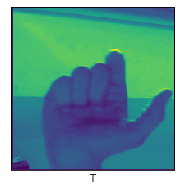

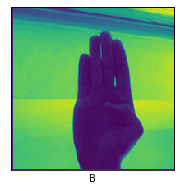

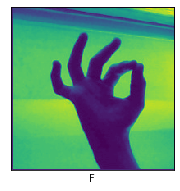

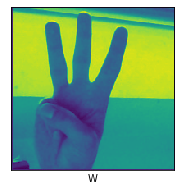

In [17]:
draw_images(get_gray, test_images_names, cmap=None)

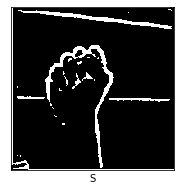

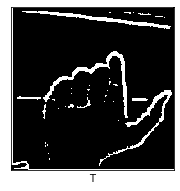

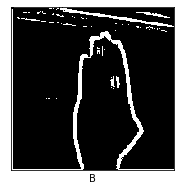

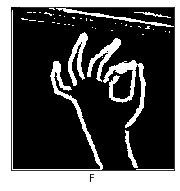

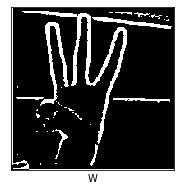

In [18]:
draw_images(get_adaptive_thresh, test_images_names)

# Data process

In [19]:
prep_data_test = 'prep_test/'
prep_gray = 'gray/'
prep_thresh = 'thresh/'
prep_adaptive_thresh = 'adaptive_thresh/'

In [17]:
for img_name in test_images_names:
    
    image = cv2.imread(data_path + test_data_path + img_name)
    
    gray = get_gray(image)
    
    thresh = get_thresh(image)

    adaptive_thresh = get_adaptive_thresh(image)
    
    cv2.imwrite(data_path + prep_data_test + prep_gray + img_name, ~gray)
    cv2.imwrite(data_path + prep_data_test + prep_thresh + img_name, ~thresh)
    cv2.imwrite(data_path + prep_data_test + prep_adaptive_thresh + img_name, ~adaptive_thresh)

In [20]:
prep_data_train = 'prep_train/'
train_data_path

'asl_alphabet_train/'

In [21]:
train_dirs_names = os.listdir(data_path + train_data_path)
train_dirs_names.sort()

In [20]:
train_images_count = []
for ndir in train_dirs_names:
    train_images_count.append(len(os.listdir(data_path + train_data_path + ndir)))
train_images_count

[3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000]

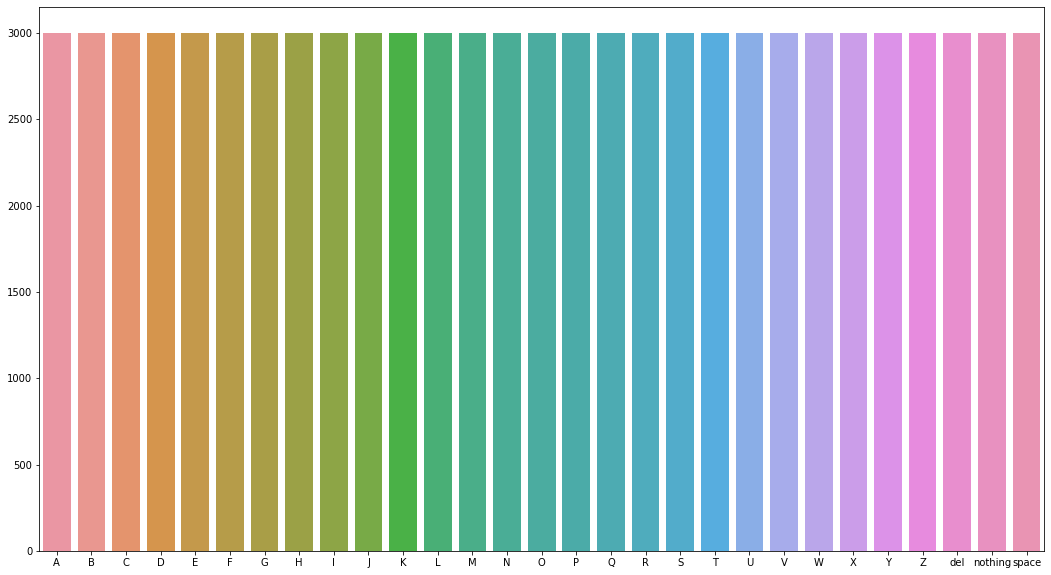

In [21]:
fig = plt.figure(figsize=(18,10))
sns.barplot(y = train_images_count, x=train_dirs_names)
plt.show()

In [23]:
path_from = data_path + train_data_path
path_to = data_path + prep_data_train
for ndir in train_dirs_names:
    nimgs = os.listdir(path_from + ndir)
    
    if not os.path.exists(path_to + prep_gray + ndir):
        os.mkdir(path_to + prep_gray + ndir)
        
    if not os.path.exists(path_to + prep_thresh + ndir):
        os.mkdir(path_to + prep_thresh + ndir)

    if not os.path.exists(path_to + prep_adaptive_thresh + ndir):
        os.mkdir(path_to + prep_adaptive_thresh + ndir)
    
    for nimg in nimgs:
        image = cv2.imread(path_from + ndir + '/' + nimg)

        if os.path.exists(path_to + prep_adaptive_thresh + ndir + '/' + nimg):
            continue
        
        gray = get_gray(image)
    
        thresh = get_thresh(image)

        adaptive_thresh = get_adaptive_thresh(image)

        cv2.imwrite(path_to + prep_gray + ndir + '/' + nimg, ~gray)
        cv2.imwrite(path_to + prep_thresh + ndir + '/' + nimg, ~thresh)
        cv2.imwrite(path_to + prep_adaptive_thresh + ndir + '/' + nimg, ~adaptive_thresh)

In [27]:
base_path = data_path + prep_data_train
dirs_with_train = os.listdir(base_path)

In [28]:
dirs_with_train

['thresh',
 'thresh_abcd',
 'adaptive_thresh_abcd',
 'gray',
 'adaptive_thresh',
 'gray_abcd']

In [29]:
for ndir in dirs_with_train[1:]:
    print(ndir + ": ")
    nlabels = os.listdir(base_path + ndir)
    for label in nlabels:
        print(" -" + label)
        nimgs = os.listdir(base_path + ndir + '/' + label)
        for nimg in nimgs:
            image = cv2.imread(base_path + ndir + '/' + label + '/' + nimg)
            resized = cv2.resize(image, (224, 224), interpolation = cv2.INTER_AREA)
            cv2.imwrite(base_path + ndir + '/' + label + '/' + nimg, resized)

thresh_abcd: 
 -A
 -B
 -D
 -C
adaptive_thresh_abcd: 
 -A
 -B
 -D
 -C
gray: 
 -nothing
 -A
 -H
 -F
 -B
 -P
 -Y
 -X
 -O
 -J
 -del
 -K
 -Q
 -S
 -R
 -E
 -W
 -G
 -U
 -D
 -C
 -N
 -M
 -I
 -T
 -space
 -Z
 -L
 -V
adaptive_thresh: 
 -nothing
 -A
 -H
 -F
 -B
 -P
 -Y
 -X
 -O
 -J
 -del
 -K
 -Q
 -S
 -R
 -E
 -W
 -G
 -U
 -D
 -C
 -N
 -M
 -I
 -T
 -space
 -Z
 -L
 -V
gray_abcd: 
 -A
 -B
 -D
 -C
